In [20]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
# import pandas_ta as ta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [21]:
def plot_series_dist(series):
    data = series
    # 使用matplotlib画直方图
    plt.hist(data, bins=60, edgecolor='k', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.show()

In [22]:
root_path = '../../Offline/backtest/backtest_data/000016/'
file_list = sorted(os.listdir(root_path))
file_list

['stock_selection_results_20190101.pkl',
 'stock_selection_results_20190701.pkl',
 'stock_selection_results_20200101.pkl',
 'stock_selection_results_20200701.pkl']

In [23]:
df = pd.concat(pd.read_pickle(root_path + file) for file in file_list)
# df = df.groupby('datetime', group_keys=False).apply(lambda x: x.nlargest(10, 'label_pred'))
# df = df.groupby('datetime', group_keys=False).apply(lambda x: x.nsmallest(10, 'label_pred'))
true_label = (df['label'] > 0).astype(int)
pred_label = (df['label_pred'] > 0).astype(int)
accuracy = accuracy_score(true_label, pred_label)
precision = precision_score(true_label, pred_label)
recall = recall_score(true_label, pred_label)
confusion = confusion_matrix(true_label, pred_label)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
print(f"Confusion: {pd.DataFrame(confusion, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])}")
print(f"\n")

Accuracy: 0.51, Precision: 0.53, Recall: 0.78
Confusion:                  Predicted Negative  Predicted Positive
Actual Negative                1718                7068
Actual Positive                2320                8017




In [24]:
# df.head(10)

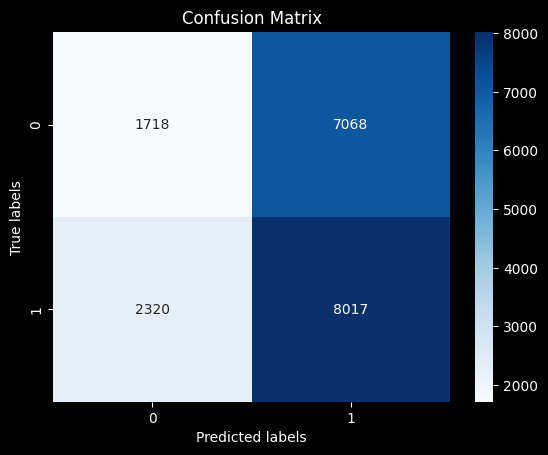

In [25]:
# 使用Seaborn绘制混淆矩阵
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

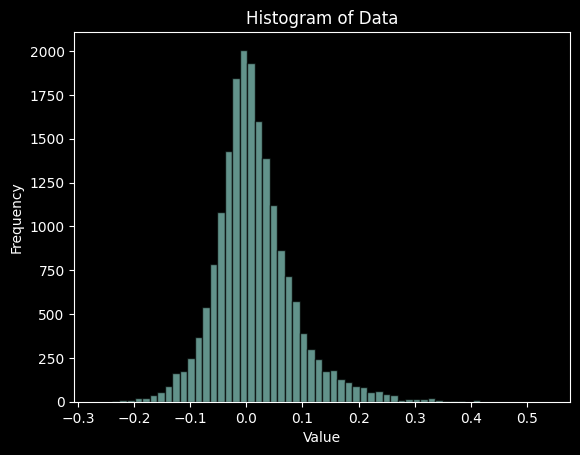

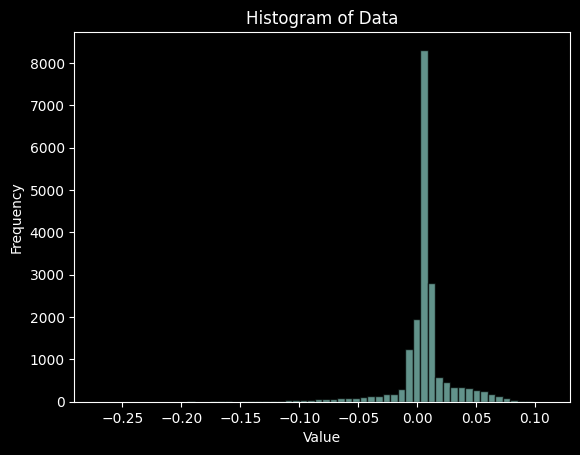

In [26]:
plot_series_dist(df['label'])
plot_series_dist(df['label_pred'])